# Nonlinear least-squares regression

There is one more important unconstrained minimization that we should discuss: non-linear least-squares, which is the extension of the linear least-square regression we did for curve fitting.

Now, we have several measurements in pairs $(x_i, y_i)$ and we wish to fit a function of $x$ which depends in some complex, nonlinear fashion on a set of parameters $\beta$. E.g.: $f(x,\beta) = sin(\beta_1 x) e^{\beta_2 x^3}$

Our goal is to choose the set of *parameteres* $\beta$ that minimizes the of the sum of the least squares of the residuals, $r_i = f(x_i,\beta) - y_i$:

$$\begin{align}
\min_\beta F = \min_\beta \sum_i r_i^2 = \min_\beta \sum_i [f(x_i,\beta) - y_i]^2
\end{align}$$

Note: $F$ is necessarily symmetric and positive semidefinite, therefore any extremum is a minimum.

## Gauss-Newton's regression:


Let's consider Newton's optimization:

$$ \frac{\partial^2 F}{\partial \beta^2} \Delta \beta = - \frac{\partial F}{\partial \beta} $$

Since $F$ is the sum of squared $r_i$ we can expand:
$$ \begin{align}
\frac{\partial F}{\partial \beta} = 2 r \frac{\partial r}{\partial \beta} = 2 r J
\end{align} $$

where $J = \frac{\partial r}{\partial \beta}$ is the Jacobian of the residuals with respect to the parameters. Since we typically have more data points (residuals) than parameters, this is rectangular.

The Hessian is expanded:
$$ \begin{align}
\frac{\partial^2 F}{\partial \beta^2} &= 2 \sum_i \frac{\partial r_i}{\partial \beta_j} \frac{\partial r_i}{\partial \beta_k} + r \frac{\partial^2 r_i}{\partial \beta_j \partial \beta_k} \\
&= 2\bigg[ J J^T +  r \frac{\partial^2 r_i}{\partial \beta_j \partial \beta_k} \bigg]
\end{align} $$

The second derivative in the Hessian is troublesome for computation. Luckily, near the root $r\rightarrow 0$ and we can disregard the term entirely:

$$\begin{align}
\frac{\partial^2 F}{\partial \beta^2} \approx 2 \sum_i J J^T
\end{align} $$

Our minimization now becomes,

$$ \begin{align}
J J^T \Delta \beta &= -J r \\
\Delta \beta &= -[J J^T]^{-1} J r \\
&= -J^\dagger r
\end{align}
$$

where $J^\dagger$ is the pseudoinverse of the Jacobian!


This is an interesting result since it suggests we could write the original problem as solving $J \Delta \beta = -r$ which is the Newton-Raphson method for *root finding*, not minimization... Remember however, that this is the *pseudoinverse*, not the true inverse. Indeed, if we had exactly as many data points as parameters, $J$ would be square, and we *would* be able to find the exact solution which is the root! The fact that this is analagously true for least squares regression comes from 1) approximating the Hessian as the product of Jacobians, and 2) properties of the pseudo-inverse in performing linear least-squares.

## The Levenberg-Marquardt algorithm

The problem with Gauss-Newton is that the Hessian approximation is only good near the root, and the method fails unless the initial guess is good.

Levenberg-Marquardt blends Gauss-Newton with Gradient decent:

$$
[J J^T + \lambda I ] \Delta \beta = -J r
$$

When $\lambda$ is small, the method reduces to Gauss-Newton. When it is large, the $J J^T$ term can be disregarded and the method is simply gradient decent. Determination of $\lambda$ is a matter of heuristics and implementation.

The Levenberg-Marquart algorithm is the go-to for common lst solvers including scipy, numpy, and tools like Excel.

### Example: Nonlinear curve fit

Fitted parameters: [2.55266109 1.34621434 0.47897151]


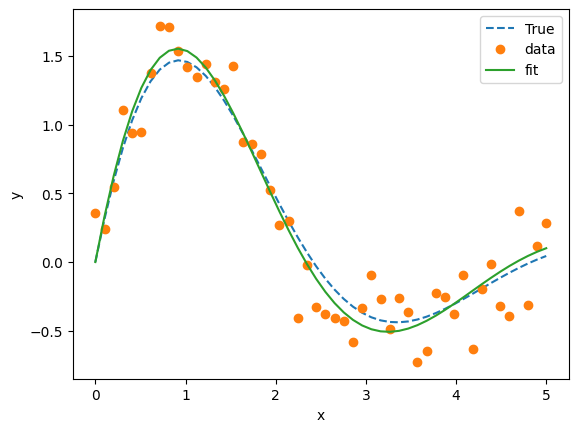

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def func(x, a, b, c):
  return a * np.sin(b * x) * np.exp(-c * x)

# Generate some sample data
x_data = np.linspace(0, 5, 50)
y_data = func(x_data, 2.5, 1.3, 0.5) + np.random.normal(0, 0.2, 50)

# Perform the curve fit
popt, _ = curve_fit(func, x_data, y_data)

# Print the fitted parameters
print("Fitted parameters:", popt)

# Generate the fitted curve
y_fit = func(x_data, *popt)

# True function
y_true = func(x_data, 2.5, 1.3, .5)

# Plot the data and the fitted curve
plt.plot(x_data, y_true, '--', label='True')
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, y_fit, '-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Example: Nonlinear 2D curve fit

Fitted parameters: [ 9.99242341e-01 -1.10886030e-03  1.03302831e+00  6.17376908e-04
  9.68851674e-01 -3.79420297e-03]


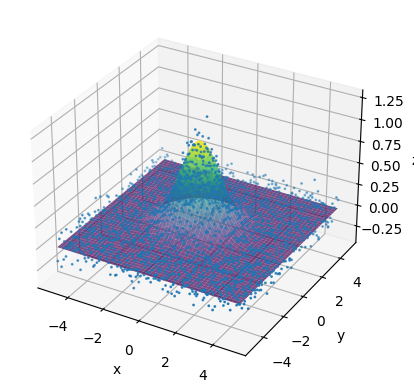

In [2]:
# prompt: make a 2D example of a nonlineaar curve_fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

# Define the function to fit (e.g., a 2D Gaussian)
def func(X, a, b, c, d, e, f):
  x, y = X
  return a * np.exp(-((x - b)**2 / (2 * c**2) + (y - d)**2 / (2 * e**2))) + f

# Generate some sample data
x_data = np.linspace(-5, 5, 50)
y_data = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_data, y_data)
Z_data = func((X, Y), 1, 0, 1, 0, 1, 0) + np.random.normal(0, 0.1, (50, 50))

# Flatten the data for curve_fit
x_data_flat = X.flatten()
y_data_flat = Y.flatten()
z_data_flat = Z_data.flatten()

# Perform the curve fit
initial_guess = [1, 0, 1, 0, 1, 0]  # Provide an initial guess for the parameters
popt, _ = curve_fit(func, (x_data_flat, y_data_flat), z_data_flat, p0=initial_guess)

# Print the fitted parameters
print("Fitted parameters:", popt)

# Generate the fitted surface
Z_fit = func((X, Y), *popt)


# Plot the data and the fitted surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data_flat, y_data_flat, z_data_flat, label='data', s = 1)
ax.plot_surface(X, Y, Z_fit, cmap='viridis', alpha=0.7, label='fit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
